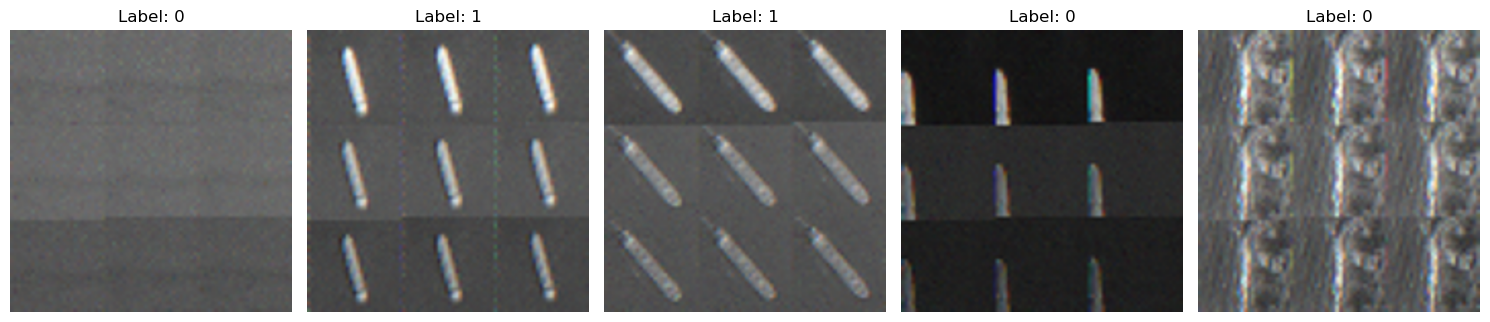

In [2]:
# Import libraries
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # For oversampling

# Step 1: Load the dataset
def load_shipsnet(data_dir):
    # Path to the JSON file
    json_path = os.path.join(data_dir, "shipsnet.json")
    
    # Load the JSON file
    with open(json_path, "r") as f:
        data = json.load(f)
    
    # Extract images and labels
    images = np.array(data["data"]).astype("uint8")
    labels = np.array(data["labels"])
    
    # Reshape images to (80x80x3)
    images = images.reshape(-1, 80, 80, 3)
    
    return images, labels

# Step 2: Preprocess the data
def preprocess_data(images, labels):
    # Resize images from 80x80 to 224x224
    resized_images = []
    for img in images:
        img_pil = Image.fromarray(img)
        img_resized = img_pil.resize((224, 224))  # Resize to 224x224
        resized_images.append(np.array(img_resized, dtype=np.uint8))  # Keep as uint8 to save memory
    
    resized_images = np.array(resized_images, dtype=np.uint8)  # Keep as uint8 before normalization

    # Normalize pixel values to [0, 1] and convert to float32 (to save memory)
    resized_images = resized_images.astype(np.float32) / 255.0  

    return resized_images, labels

# Step 3: Split data into train/validation/test sets
def split_data(images, labels):
    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    images_flat = images.reshape(images.shape[0], -1)  # Flatten images for SMOTE
    images_resampled, labels_resampled = smote.fit_resample(images_flat, labels)
    images_resampled = images_resampled.reshape(-1, 224, 224, 3)  # Reshape back to original shape

    # Split the resampled data into train/validation/test sets
    X_train, X_test, y_train, y_test = train_test_split(images_resampled, labels_resampled, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Step 4: Visualize some images
def visualize_images(images, labels, num_samples=5):
    # Create a figure to display images
    plt.figure(figsize=(15, 5))
    
    # Display random samples
    for i in range(num_samples):
        # Randomly select an image
        idx = np.random.randint(0, len(images))
        image = images[idx]
        label = labels[idx]
        
        # Plot the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {label}")
        plt.axis("off")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Step 5: Main function
def main():
    # Path to the dataset
    data_dir = r"C:\Users\Victus\ShipProject_Plan_B\Dataset"
    
    # Load the dataset
    images, labels = load_shipsnet(data_dir)
    
    # Preprocess the data
    resized_images, labels = preprocess_data(images, labels)
    
    # Split the data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(resized_images, labels)

    # Ensure the "data" directory exists
    os.makedirs("data", exist_ok=True)

    # Save the preprocessed data to files
    np.save("data/X_train.npy", X_train)
    np.save("data/X_val.npy", X_val)
    np.save("data/X_test.npy", X_test)
    np.save("data/y_train.npy", y_train)
    np.save("data/y_val.npy", y_val)
    np.save("data/y_test.npy", y_test)
    
    # Visualize some images (optional)
    visualize_images(X_train, y_train, num_samples=5)
    
    # Return preprocessed data for training
    return X_train, X_val, X_test, y_train, y_val, y_test

    # After loading the dataset (images, labels = load_shipsnet(data_dir))
    unique_labels, counts = np.unique(labels, return_counts=True)
    print(f"Class 0 (no ship): {counts[0]} images")
    print(f"Class 1 (ship): {counts[1]} images")

    # Visualize class distribution
    plt.figure(figsize=(8, 5))
    plt.bar(unique_labels, counts, color=["blue", "orange"])
    plt.xticks(unique_labels, ["No Ship", "Ship"])
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Class Distribution in Dataset")
    plt.show()

    # Calculate imbalance ratio
    imbalance_ratio = counts[0] / counts[1]
    print(f"Imbalance Ratio (No Ship / Ship): {imbalance_ratio:.2f}")
    
# Run the script
if __name__ == "__main__":
    X_train, X_val, X_test, y_train, y_val, y_test = main()